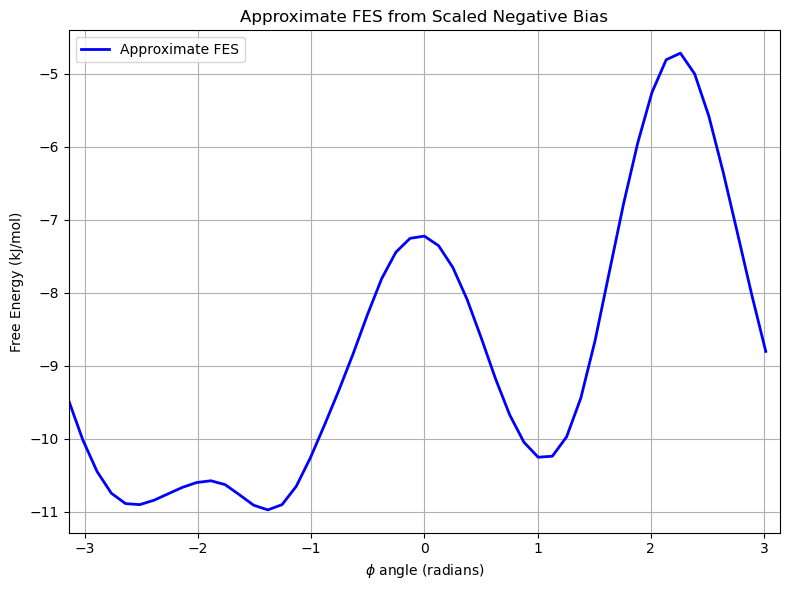

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 读取 grid 文件，假设文件包含 phi 和 metad.bias 的列
file_path = "metadynamics_calculation.grid.dat"
biasfactor = 10  # 替换为你实际使用的 BIASFACTOR 值
scaling_factor = biasfactor - 1

try:
    # 读取数据，跳过注释行并指定列名
    data = pd.read_csv(
        file_path,
        delim_whitespace=True,
        comment='#',
        names=["phi", "metad_bias", "der_phi"]
    )
except Exception as e:
    print(f"Error reading the grid file: {e}")
    exit()

# 检查是否成功读取数据
if data.empty:
    print("No data was loaded. Please check the grid file format.")
    exit()

# 计算缩放后的自由能近似值
data["approx_fes"] = -data["metad_bias"] / scaling_factor

# 绘制近似的自由能面 (FES)
plt.figure(figsize=(8, 6))
plt.plot(data["phi"], data["approx_fes"], label='Approximate FES', color='blue', linewidth=2)
plt.xlabel(r'$\phi$ angle (radians)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Approximate FES from Scaled Negative Bias')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.xlim(-np.pi, np.pi)  # 设置 x 轴范围为 -pi 到 pi
plt.savefig('metadynamics_calculation_Approximate_FES_from_Scaled_Negative_Bias')
plt.show()
